---
title: 06 - Volcano plots for differential expression, human
author: Naz Salehin, Martin Proks
date: 27-11-2024
model: v1.1
---

In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scanpy as sc

In [55]:
sns.set_style("ticks")
palette_volcano = {
    'NS': '#999999',
    'UP': 'tab:orange',
    'DOWN': 'tab:purple'
}

In [56]:
epiblast_degs = pd.read_table("/home/gkb340/Brickman/projects/proks-salehin-collaborations/results/11_niakan_EPI_DESeq2.csv", delimiter=",")

In [57]:
epiblast_degs['negLog10padj'] = -1 * np.log10(epiblast_degs['padj'])
epiblast_degs['color'] = 'NS'
epiblast_degs.loc[((epiblast_degs['padj'] < 0.05) & (epiblast_degs['log2FoldChange'] >= 1)),'color'] = 'UP'
epiblast_degs.loc[((epiblast_degs['padj'] < 0.05) & (epiblast_degs['log2FoldChange'] <= -1)),'color'] = 'DOWN'

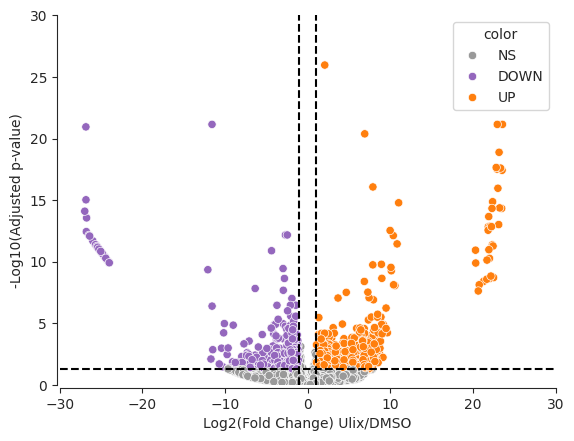

In [58]:
p = sns.scatterplot(data=epiblast_degs, x='log2FoldChange', y='negLog10padj', hue='color', palette=palette_volcano)
plt.xlim(-30,30)
plt.ylim(0,30)
plt.xlabel('Log2(Fold Change) Ulix/DMSO')
plt.ylabel('-Log10(Adjusted p-value)')
plt.axvline(x=-1, color='black', linestyle='--')
plt.axvline(x=1, color='black', linestyle='--')
plt.axhline(y=np.log10(1/0.05), color='black', linestyle='--')
sns.despine(offset=2, trim=True)

In [59]:
pre_degs = pd.read_table("/home/gkb340/Brickman/projects/proks-salehin-collaborations/results/11_niakan_PrE_DESeq2.csv", delimiter=",")

In [60]:
pre_degs['negLog10padj'] = -1 * np.log10(pre_degs['padj'])
pre_degs['color'] = 'NS'
pre_degs.loc[((pre_degs['padj'] < 0.05) & (pre_degs['log2FoldChange'] >= 1)),'color'] = 'UP'
pre_degs.loc[((pre_degs['padj'] < 0.05) & (pre_degs['log2FoldChange'] <= -1)),'color'] = 'DOWN'

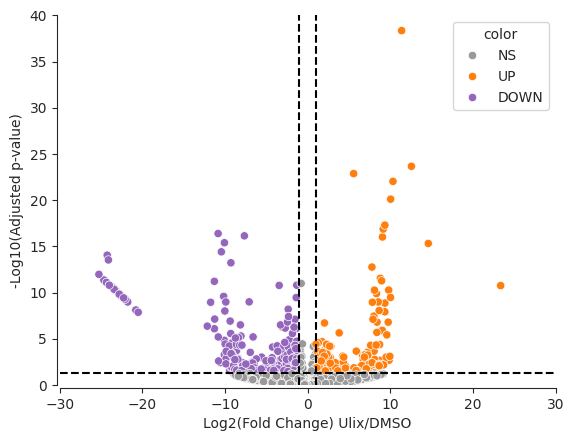

In [61]:
p = sns.scatterplot(data=pre_degs, x='log2FoldChange', y='negLog10padj', hue='color', palette=palette_volcano)
plt.xlim(-30,30)
plt.ylim(0,40)
plt.xlabel('Log2(Fold Change) Ulix/DMSO')
plt.ylabel('-Log10(Adjusted p-value)')
plt.axvline(x=-1, color='black', linestyle='--')
plt.axvline(x=1, color='black', linestyle='--')
plt.axhline(y=np.log10(1/0.05), color='black', linestyle='--')
sns.despine(offset=2, trim=True)

In [62]:
te_degs = pd.read_table("/home/gkb340/Brickman/projects/proks-salehin-collaborations/results/11_niakan_TE_DESeq2.csv", delimiter=",")

In [63]:
te_degs['negLog10padj'] = -1 * np.log10(te_degs['padj'])
te_degs['color'] = 'NS'
te_degs.loc[((te_degs['padj'] < 0.05) & (te_degs['log2FoldChange'] >= 1)),'color'] = 'UP'
te_degs.loc[((te_degs['padj'] < 0.05) & (te_degs['log2FoldChange'] <= -1)),'color'] = 'DOWN'

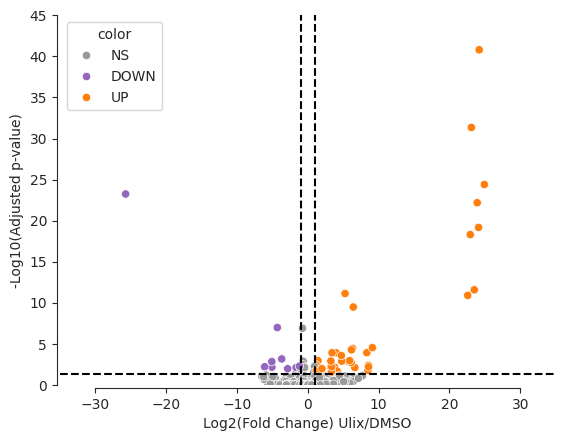

In [64]:
p = sns.scatterplot(data=te_degs, x='log2FoldChange', y='negLog10padj', hue='color', palette=palette_volcano)
plt.xlim(-35,35)
plt.ylim(0,45)
plt.xlabel('Log2(Fold Change) Ulix/DMSO')
plt.ylabel('-Log10(Adjusted p-value)')
plt.axvline(x=-1, color='black', linestyle='--')
plt.axvline(x=1, color='black', linestyle='--')
plt.axhline(y=np.log10(1/0.05), color='black', linestyle='--')
sns.despine(offset=2, trim=True)

In [262]:
niakan_adata = sc.read_h5ad("../results/niakan_08.withPredictions.adata.h5ad")


In [263]:
ENSG_to_SYMBOL = pd.read_table("../results/GRCh38.110.ENSG_to_SYMBOL.csv", delimiter=',')
ENSG_to_SYMBOL = ENSG_to_SYMBOL.set_index('ensembl')

In [264]:
niakan_adata.raw.var['gene_symbol'] = ENSG_to_SYMBOL.loc[niakan_adata.raw.var.index.values,'symbol']

In [265]:
niakan_adata.var['gene_symbol'] = ENSG_to_SYMBOL.loc[niakan_adata.var.index.values,'symbol']

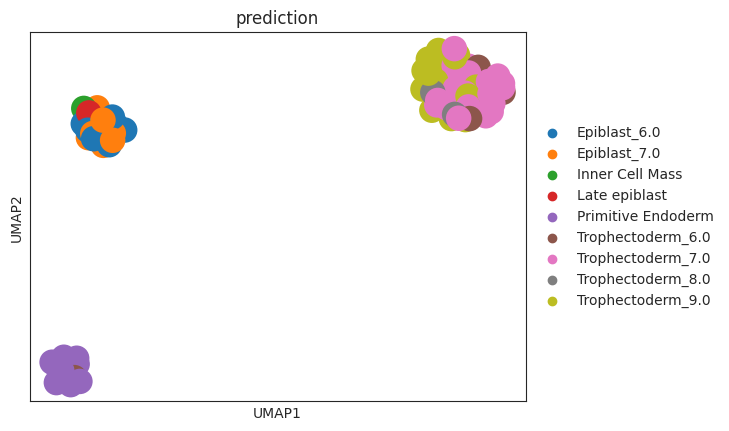

In [266]:
sc.pl.umap(niakan_adata, color="prediction", ncols=2)

In [267]:
ENSG_to_SYMBOL = pd.read_table("../results/GRCh38.110.ENSG_to_SYMBOL.csv", delimiter=',')
ENSG_to_SYMBOL = ENSG_to_SYMBOL.set_index('symbol')

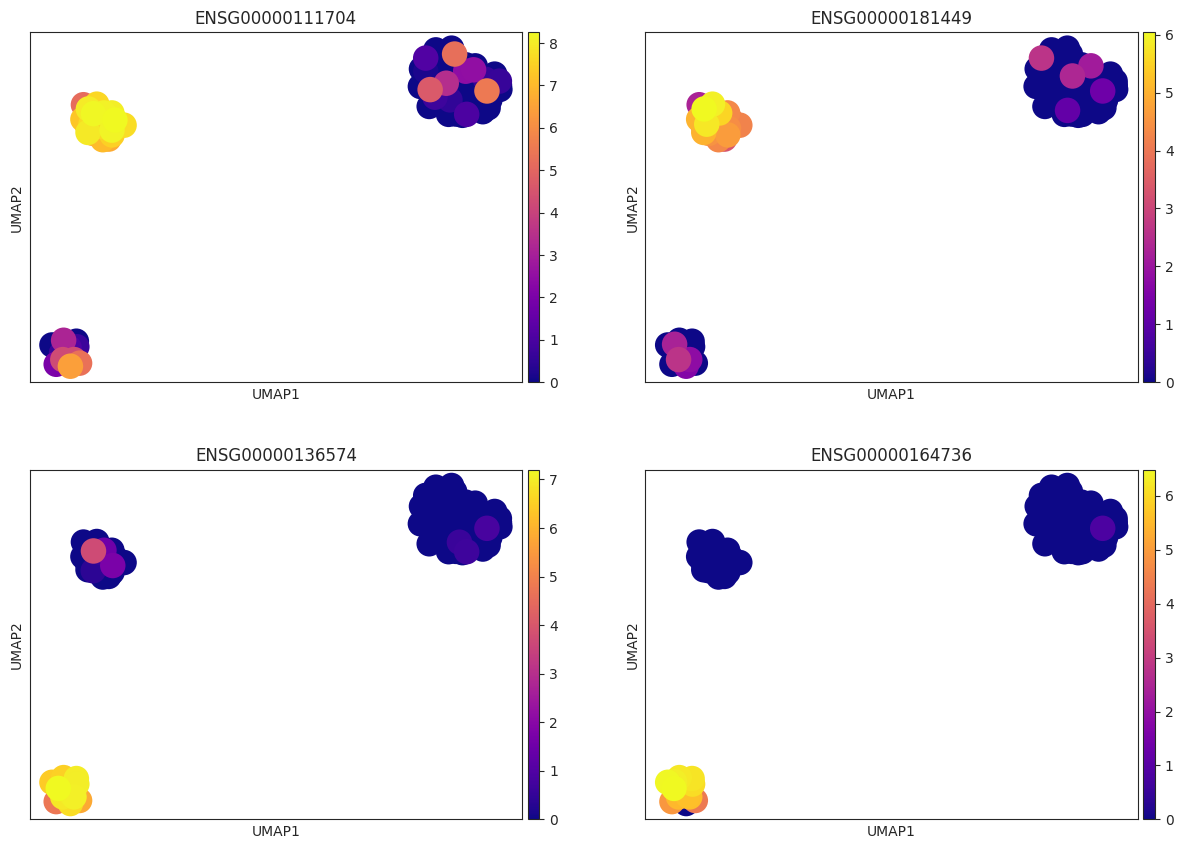

In [268]:
# NANOG: ENSG00000111704 
# SOX2: ENSG00000181449 
# GATA4: ENSG00000136574
# SOX17: ENSG00000164736


sc.pl.umap(niakan_adata, color=ENSG_to_SYMBOL.loc[['NANOG','SOX2','GATA4','SOX17'],'ensembl'], ncols=2, cmap='plasma')

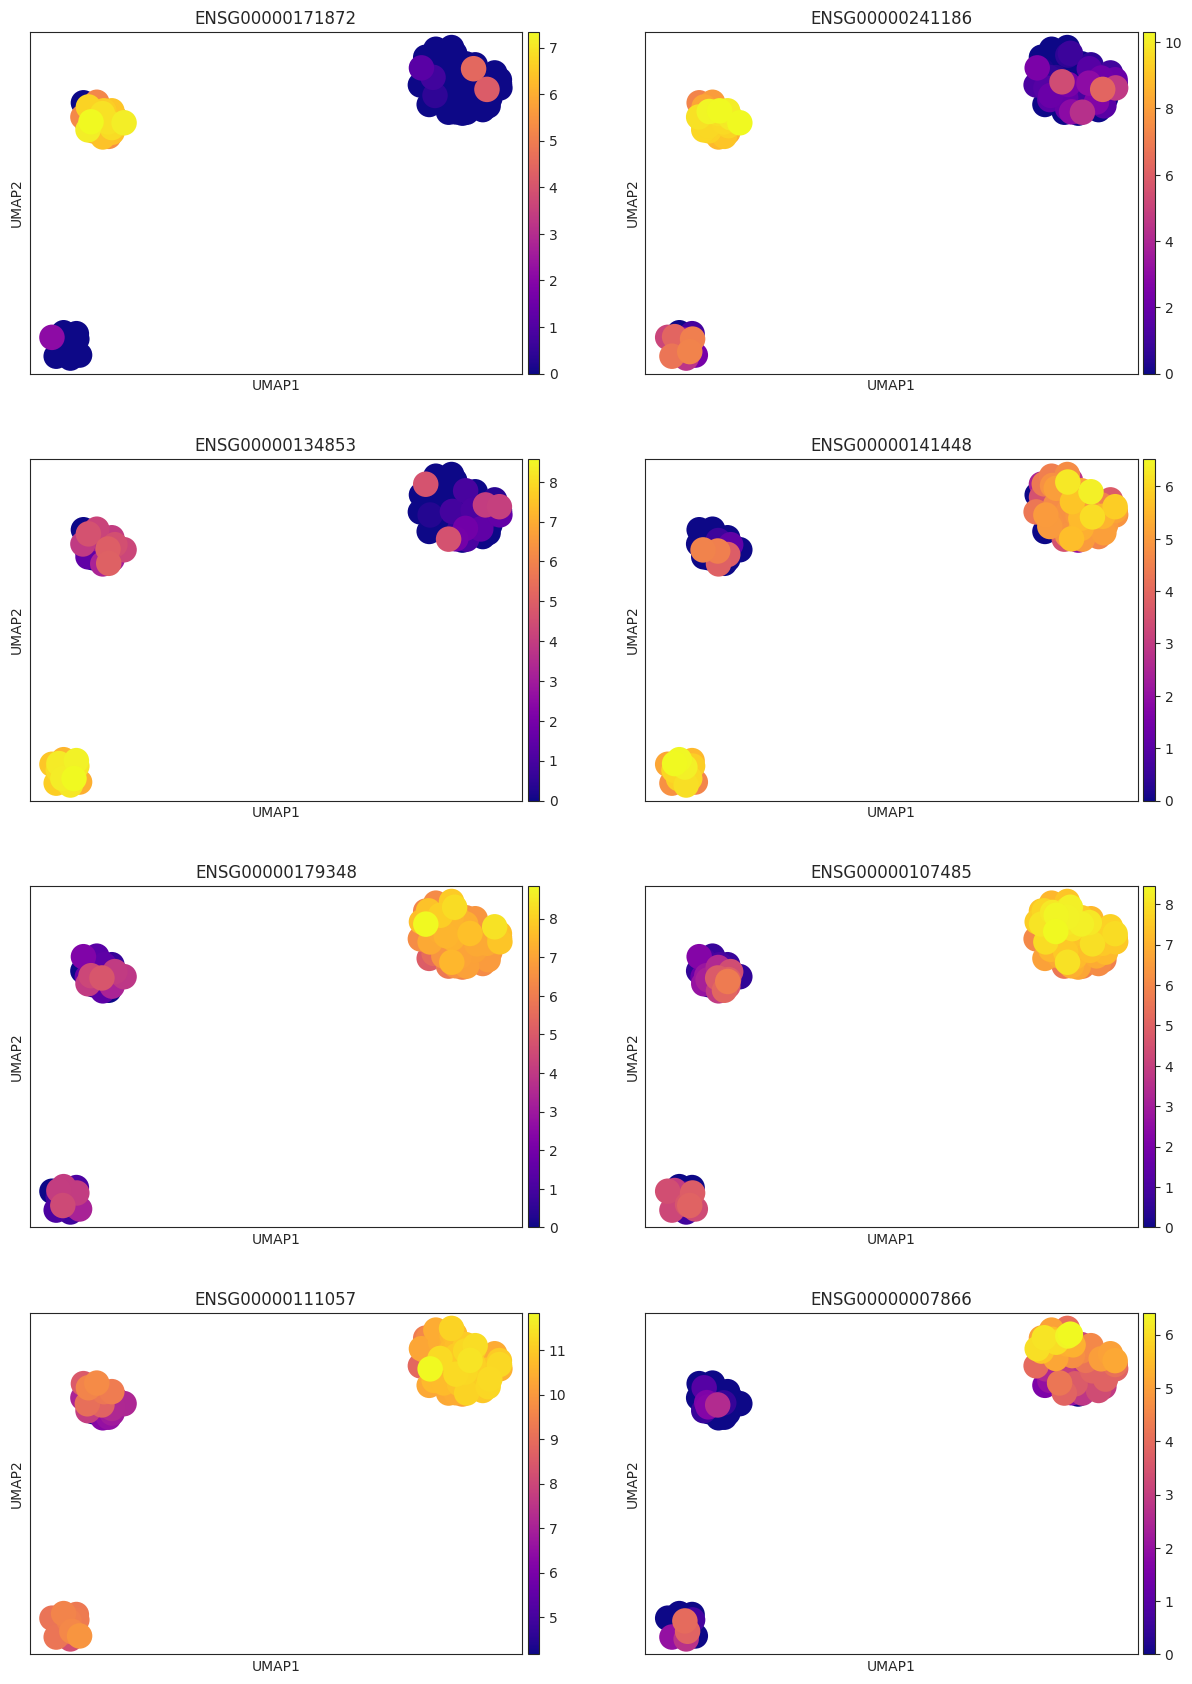

In [269]:
sc.pl.umap(niakan_adata, color=ENSG_to_SYMBOL.loc[['KLF17','TDGF1','PDGFRA','GATA6','GATA2','GATA3','KRT18','TEAD3'],'ensembl'], ncols=2, cmap='plasma')

In [270]:
def split_umap(adata, split_by, ncol=2, nrow=None, **kwargs):
    categories = adata.obs[split_by].cat.categories
    if nrow is None:
        nrow = int(np.ceil(len(categories) / ncol))
    fig, axs = plt.subplots(nrow, ncol, figsize=(4*ncol, 3*nrow))
    axs = axs.flatten()
    for i, cat in enumerate(categories):
        ax = axs[i]
        sc.pl.umap(adata[adata.obs[split_by] == cat], ax=ax, show=False, title=cat, size=500, cmap='plasma', **kwargs)
    return plt.tight_layout()

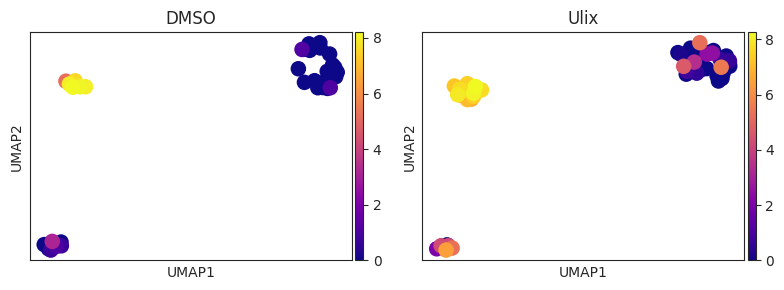

In [271]:
split_umap(niakan_adata, split_by='treatment', color=ENSG_to_SYMBOL.loc[['NANOG'],'ensembl'])

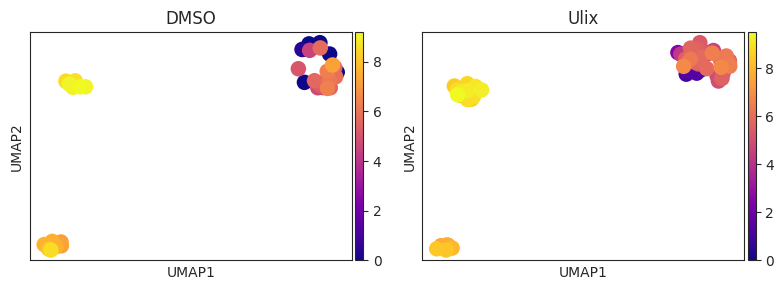

In [272]:
split_umap(niakan_adata, split_by='treatment', color=ENSG_to_SYMBOL.loc[['POU5F1'],'ensembl'])

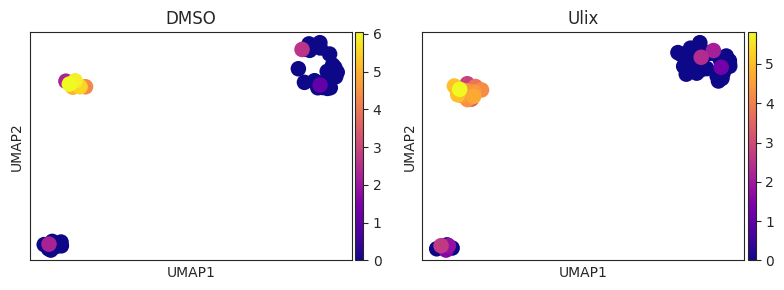

In [273]:
split_umap(niakan_adata, split_by='treatment', color=ENSG_to_SYMBOL.loc[['SOX2'],'ensembl'])

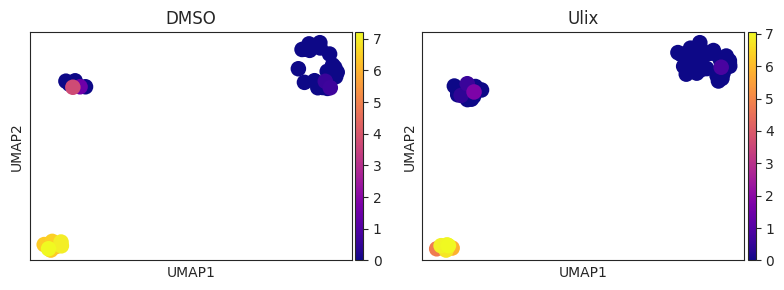

In [274]:
split_umap(niakan_adata, split_by='treatment', color=ENSG_to_SYMBOL.loc[['GATA4'],'ensembl'])

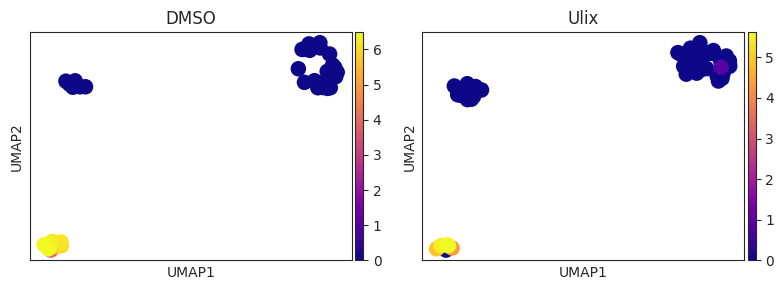

In [275]:
split_umap(niakan_adata, split_by='treatment', color=ENSG_to_SYMBOL.loc[['SOX17'],'ensembl'])

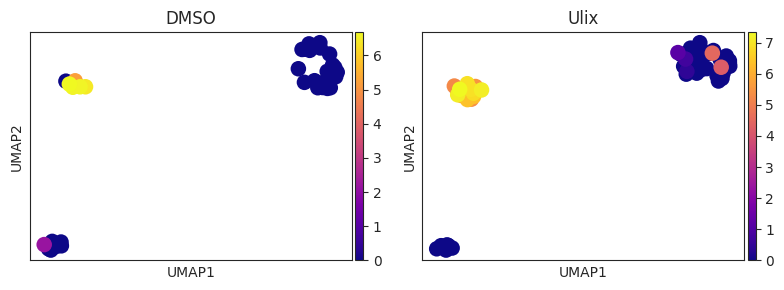

In [276]:
split_umap(niakan_adata, split_by='treatment', color=ENSG_to_SYMBOL.loc[['KLF17'],'ensembl'])

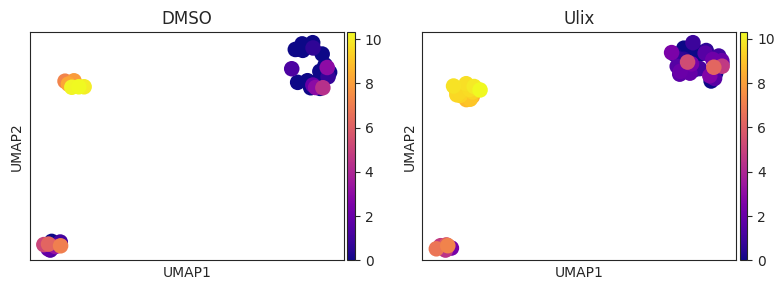

In [277]:
split_umap(niakan_adata, split_by='treatment', color=ENSG_to_SYMBOL.loc[['TDGF1'],'ensembl'])

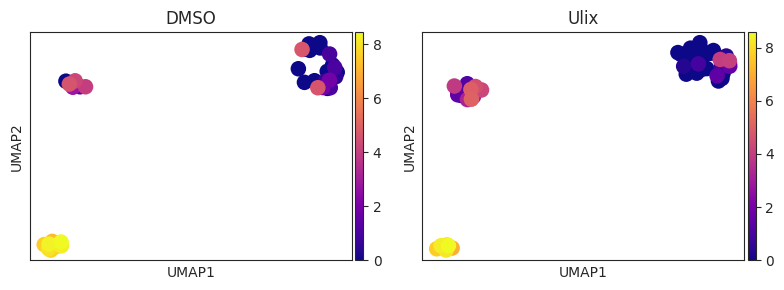

In [278]:
split_umap(niakan_adata, split_by='treatment', color=ENSG_to_SYMBOL.loc[['PDGFRA'],'ensembl'])

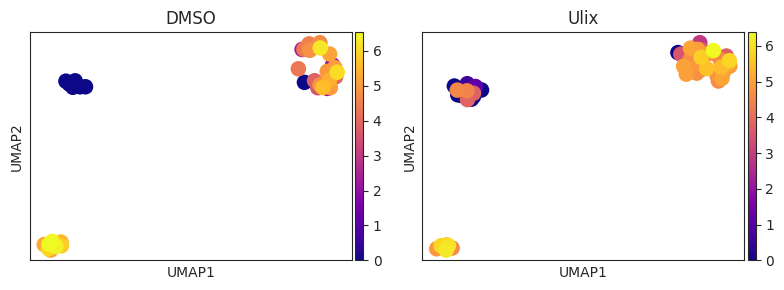

In [279]:
split_umap(niakan_adata, split_by='treatment', color=ENSG_to_SYMBOL.loc[['GATA6'],'ensembl'])

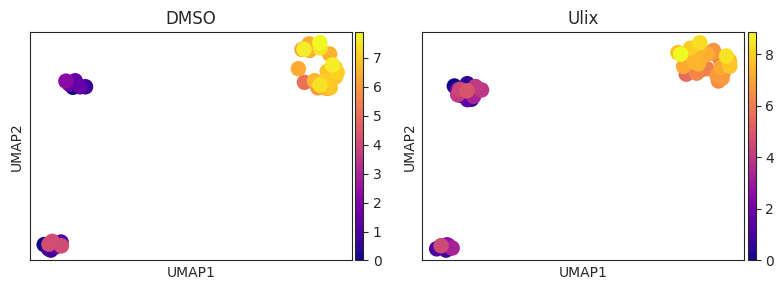

In [280]:
split_umap(niakan_adata, split_by='treatment', color=ENSG_to_SYMBOL.loc[['GATA2'],'ensembl'])

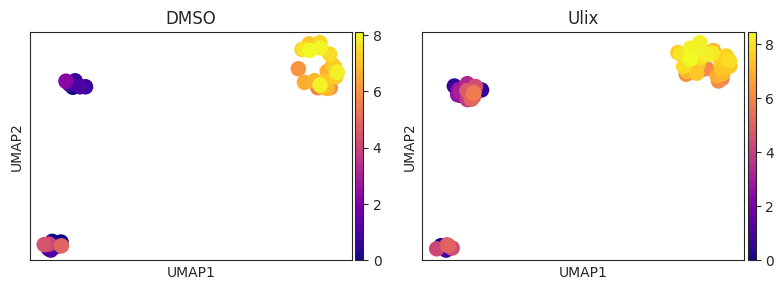

In [281]:
split_umap(niakan_adata, split_by='treatment', color=ENSG_to_SYMBOL.loc[['GATA3'],'ensembl'])

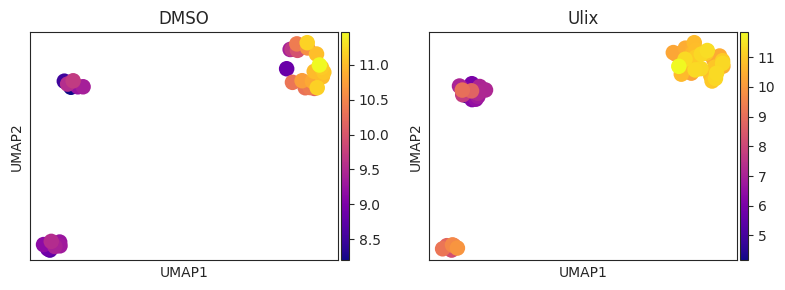

In [282]:
split_umap(niakan_adata, split_by='treatment', color=ENSG_to_SYMBOL.loc[['KRT18'],'ensembl'])

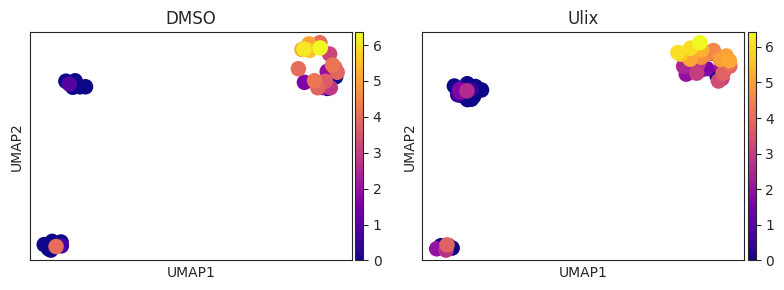

In [283]:
split_umap(niakan_adata, split_by='treatment', color=ENSG_to_SYMBOL.loc[['TEAD3'],'ensembl'])

In [284]:
coarse_predictions = {
    'Epiblast_6.0': 'Epiblast and ICM',
    'Epiblast_7.0': 'Epiblast and ICM',
    'Late epiblast': 'Epiblast and ICM',
    'Inner Cell Mass': 'Epiblast and ICM',
    'Primitive Endoderm': 'Primitive Endoderm',
    'Trophectoderm_6.0': 'Trophectoderm',
    'Trophectoderm_7.0': 'Trophectoderm',
    'Trophectoderm_8.0': 'Trophectoderm',
    'Trophectoderm_9.0': 'Trophectoderm',
 
}

In [285]:
niakan_adata.obs['coarse_predictions'] = niakan_adata.obs.prediction.map(coarse_predictions)

/projects/dan1/data/Brickman/conda/envs/scvi-1.1.5/lib/python3.10/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


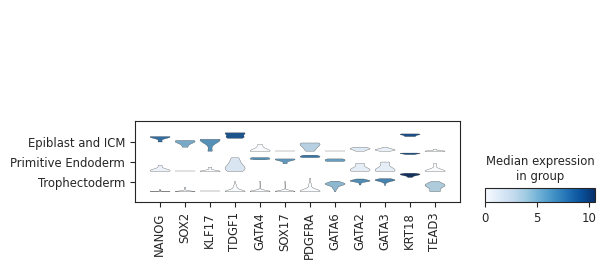

In [286]:
sc.pl.stacked_violin(niakan_adata[niakan_adata.obs.treatment == 'DMSO'], ['NANOG','SOX2','KLF17','TDGF1','GATA4','SOX17','PDGFRA','GATA6','GATA2','GATA3','KRT18','TEAD3'], dendrogram=False, gene_symbols='gene_symbol', groupby='coarse_predictions')

/projects/dan1/data/Brickman/conda/envs/scvi-1.1.5/lib/python3.10/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


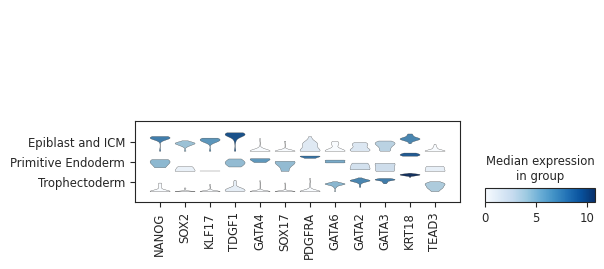

In [287]:
sc.pl.stacked_violin(niakan_adata[niakan_adata.obs.treatment == 'Ulix'], ['NANOG','SOX2','KLF17','TDGF1','GATA4','SOX17','PDGFRA','GATA6','GATA2','GATA3','KRT18','TEAD3'], dendrogram=False, gene_symbols='gene_symbol', groupby='coarse_predictions')